### Evaluation Project - 7

# Customer Churn Analysis

### Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 


### Note: You can find the dataset in the link below.

####  Downlaod Files: 
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

### Importing required liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Getting file from above source and coverting it to DataFrame.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Checking and Exploring data

In [3]:
# Checking total number of rows and columns in our data
df.shape

(7043, 21)

In [4]:
# Checking additional information of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Checking column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Checking sum of unique value of each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
# Checking unique value of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n','>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>','\n')

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

Male      3555
Female    3488
Name: gender, dtype: int64

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

No     3641
Yes    3402
Name: Partner, dtype: int64

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

No     4933
Yes    2110
Name: Dependents, dtype: int64

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

Yes    6361
No      682
Name: PhoneService, dtype: int64

 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

No   

**Data of Total charges column is look as float, however it is showing as object. After further investigation into column found that there are total 11 null values due to which our 'TotalCharges' is reflecting as objective. Need to replace blank values with null and then need to fill that place by mean value.**

In [8]:
df = df.drop('customerID',axis=1)

In [9]:
# Filling blank value in the column by NAN.
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
df["TotalCharges"].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [10]:
# converting object data type to float data type
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# checking the mean of TotalCharges column
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

### Checking null values in our data after filling null values.

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


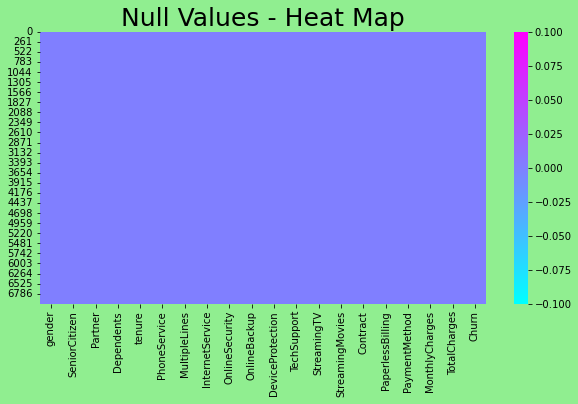

In [12]:
null = df.isnull().sum()
print(null)
plt.figure(figsize=[10,5], facecolor = 'lightgreen')
sns.heatmap(df.isnull(), cmap = 'cool')
plt.title(("Null Values - Heat Map"), fontsize = 25)
plt.show()

### OBSERVATIONS:
**>>>>>>>>>>>>>>>>>>>>**

===========================================================================================================================
**Columns in our data have mostly objective Data type, also there are no null values. Data has 7,043 rows and 21 columns. The above dataset contains details of customers with both numerical and categorical data. "Churn" is the target variable which contains 2 categories (Yes and No) so it is a "classification problem" where we will predict the customer churn using the classification models.**

#### Let further check more detail of each column:-
=====================================

**1. customerID -** Customer ID is actually unique and a unique ID is associated to each customer, Column type is object, the data in each row is unique.

**2. gender -** This column's type is also object, currently this data is categorical (Male and Female), we will further convert this to numeric using label encoder. There are no null values in this column as well.

**3. SeniorCitizen -** Column type is integer, we will further require this in model building also currently there are no changes required in this column. (0 represents – No and 1 represents – Yes)

**4. Partner –** Column type is object, currently this data is categorical (Yes and No), we will further covert this to numeric using label encoder. There are no null values in this column as well.

**5. Dependents -** If customer have any dependents, column type is object, this data is also categorical (yes and no), we will convert this to numeric using label encoder. There isn’t any null value in this column.

**6. Tenure –** Since how long he/she is our customer, the data type of this column is integer, also there are no null values in this column. This column has 73 unique values with 613 as maximum and 11 as minimum.

**7. PhoneService –** Column type is object, this is a categorical (Yes and No), we will convert it to numeric using label encoder. There isn’t any null value.

**8. MultipleLines –** Column type is object, this is categorical (Yes, No and No Phone Service), we will convert it to numeric using label encoder. There isn’t any null value.

**9. InternetService –** Column type is object, this is categorical column (Fiber optic, DSL, No), we will convert it to numeric using label encoder. No null value in this column.

**10. OnlineSecurity –** Column type is object, this is categorical column (Yes, No, No internet service) we will convert it to numeric using label encoder. No null value in this column.

**11. OnlineBackup –** Column type is object, this is categorical column (Yes, No, No internet service) we will convert it to numeric using label encoder. No null value in this column.

**12. DeviceProtection –** Column type is object, this is categorical column (Yes, No, No internet service) we will convert it to numeric using label encoder. No null value in this column.

**13. TechSupport -** Column type is object, this is categorical column (Yes, no, no internet service) we will convert it to numeric using label encoder. No null value in this column.

**14. StreamingTV –** Column type is object, this is categorical column (Yes, no, no internet service) we will convert it to numeric using label encoder. No null value in this column.

**15. StreamingMovies –** Column type is object, this is categorical column (Yes, no, no internet service) we will convert it to numeric using label encoder. No null value in this column.

**16. Contract –** Column type is object, this is categorical column (Month to Month, One Year and Two Year) we will convert it to numeric using label encoder. No null value in this column.

**17. PaperlessBilling –** Column type is object, this is categorical column (Yes, No) we will convert it to numeric using label encoder. No null value in this column.

**18. PaymentMethod –** Column type is object, this is categorical column (Electronic check, mailed check, bank transfer (automatic) and Credit card (automatic)) we will further convert it to numeric using Label encoder. No null values in this column.

**19. MonthlyCharges –** Column type is float64, there are 1585 unique values.

**20. TotalCharges –** Column type is float, we replaced 11 blank values with mean value.

**21. Churn –** This is our target column, currently this is categorical (Yes, No) we will convert it to numeric using label encoder.
      
===========================================================================================================================

# DATA PREPROCESSING AND EDA - EXPLORATORY DATA ANALYSIS
**>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>**

## 1. UNIVARIATE ANALYSIS

### Visualizing Target Column - CHRUN

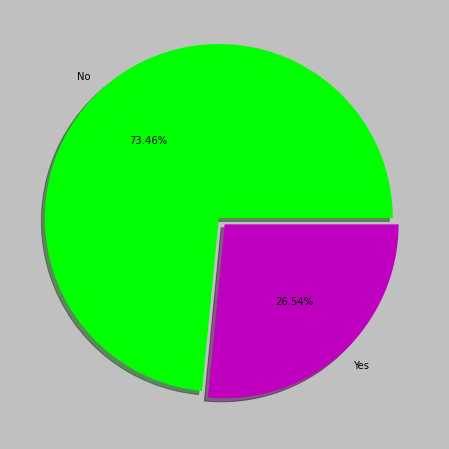

*************************
No     5174
Yes    1869
Name: Churn, dtype: int64
*************************
7043  = Total Customers
************************* 

Observation - Out of 7,043 customers, 1,869 were churned while 5,174 were not.


In [13]:
# VISUALIZING TARGET COLUMN USING PIE GRAPH
#--------------------------------------------
labels='No','Yes'
fig, ax = plt.subplots(figsize=(8,8), facecolor = 'silver')
colors=["lime","m"]
ax.pie(df['Churn'].value_counts(), labels=labels, autopct='%1.2f%%', explode=(0.05,0),shadow=True,colors=colors)
plt.show()
print ('*************************')
print(df['Churn'].value_counts())
print ('*************************')
print(df['Churn'].value_counts().sum(), ' = Total Customers')
print ('*************************', '\n')
print ('Observation - Out of 7,043 customers, 1,869 were churned while 5,174 were not.')

## Visualizing Catergorical Columns

In [14]:
# Removing target columns and all numeric columns and assiging to new variable.
a = df.drop(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], axis = 1)

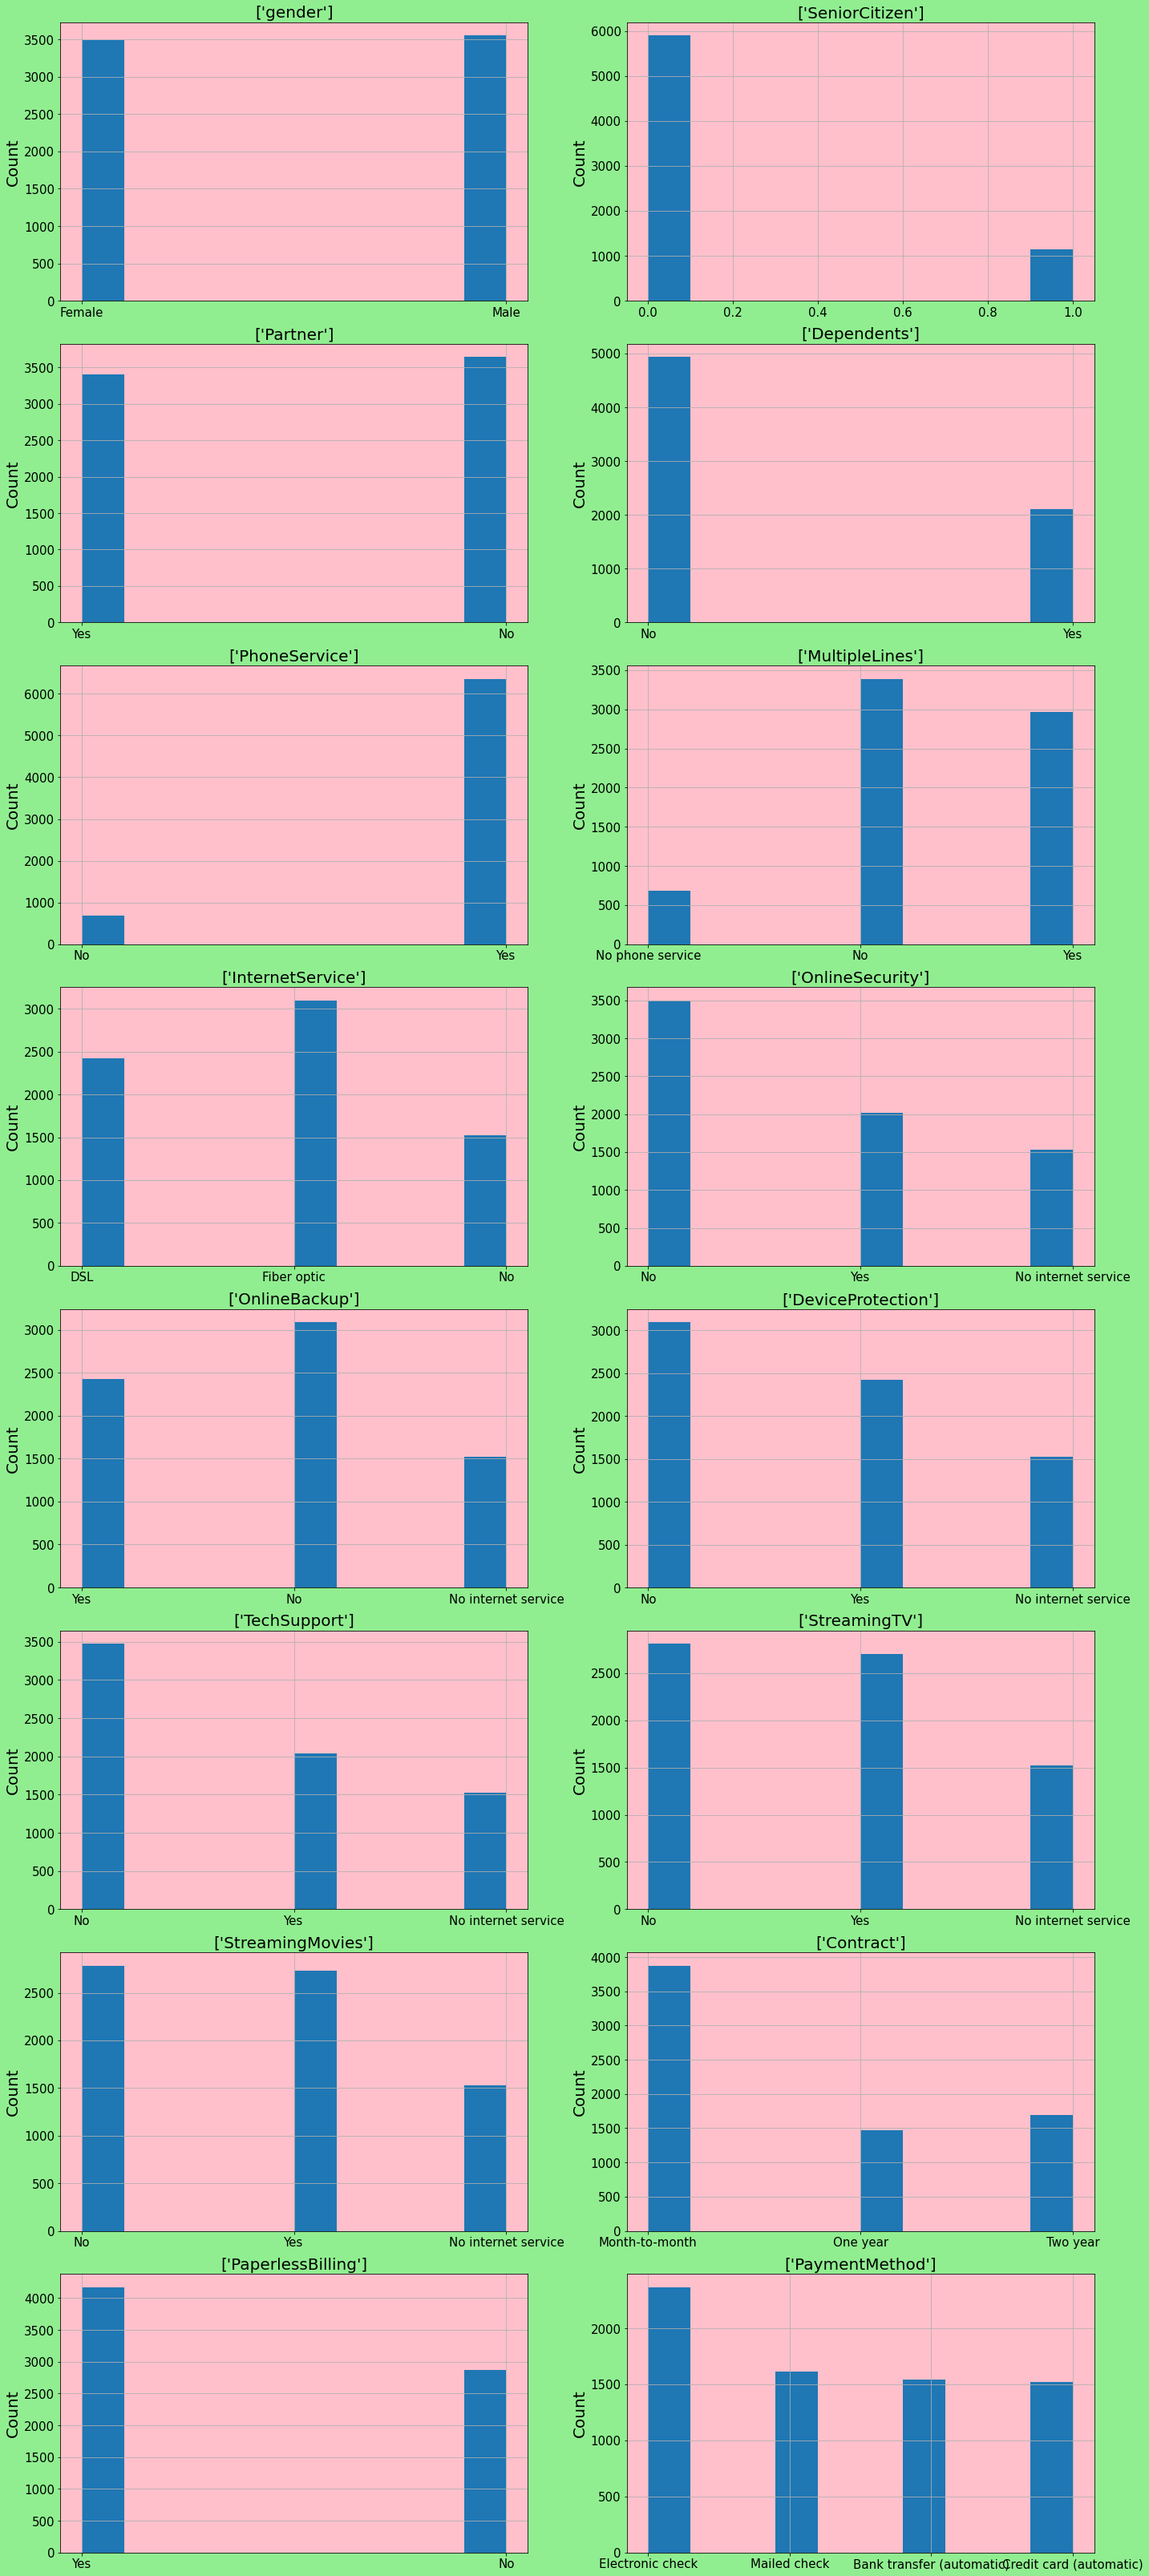

In [15]:
collist = a.columns.values

plt.figure(figsize=(20,50), facecolor = 'lightgreen')
  
for i in range(0,len(collist)):
    plt.subplot(9,2,i+1, facecolor = 'pink')
    a[collist[i]].hist()
    plt.title(f"{[collist[i]]}", fontsize = 20)
    plt.ylabel('Count', fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.tight_layout()

# Observation of above Graphs
**>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>**

**1. Gender -** There are 3555 male and 3488 females.

**2. SeniorCitizen -** There are 1142 senior citizens and remaining 5901 are not the senior citizens.

**3. Partner -** Out of 7043 people in our data, 3402 have partners and remaining 3641 are without partners

**4. Dependents -** 4933 people don’t have Dependents while 2110 people have Dependents.

**5. Phone Service -** 6361 people have Phone Service active while remaining 682 don’t.

**6. Multiple Lines -** 3390 people don’t have Multiple line, and 2971 have multiple lines, while remaining don’t have phone service.

**7. InternetService -** 3096 people use Fiber optic, and DSL is used by 2421 people, while remaining don’t have internet service.

**8. OnlineSecurity -** 2019 people have chosen online security, while 3498 haven’t and remaining 1526 don’t have internet

**9. OnlineBackup -** 2429 people have Online Backup, while 3088 don’t and remaining 1526 don’t have internet

**10. DeviceProtection -** 2422 have Device protection, while 3095 don’t, remaining 1526 don’t have internet

**11. TechSupport -** 2044 people have received tech support, while 3473 don’t, remaining 1526 don’t have internet service

**12. StreamingTV -** 2707 people have streamed TV, while 2810 haven’t, remaining 1526 don’t have internet service.

**13. StreamingMovies -**    2732 people have streamed movies and 2785 didn’t, remaining 1526 don’t have internet service. 

**14. Contract -** 3875 people have Month - to Month contract, 1695 people have two-year contract, while 1473 have one year contract.

**15. PaperlessBilling -** 4171 people have chosen paperless billing option, while remaining 2872 haven’t

**16. PaymentMethod -** There are 4 payment options/method, 2365 have used electronic check, 1612 have used Mailed check, 1544 have bank transferred, while remaining 1522 have chosen credit card (automatic) payment option.

===========================================================================================================================

## 2. BIVARIATE ANALYSIS

### Visualizing Churn data with categorical columns

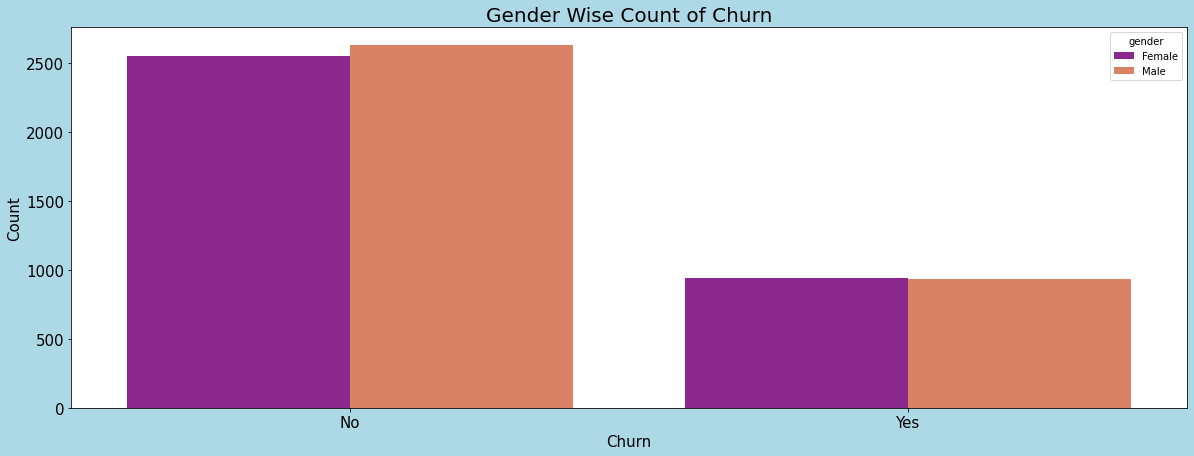

In [16]:
# Gender
plt.figure(figsize=(20,7), facecolor = 'lightblue')
sns.countplot( x = 'Churn',hue = 'gender',data = df, palette = 'plasma')
plt.title('Gender Wise Count of Churn',fontsize=20)
plt.xlabel('Churn',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

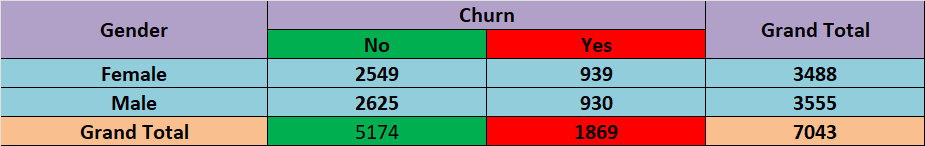

**Observation - There are total 7043 people, out of which 3555 are Male and 3488 are Female, from 3555 male 930 are churned and remaining 2625 are not churned, out of 3488 female 2459 are not churned and remaining 939 are churned. Both Male and Female have almost equal data**

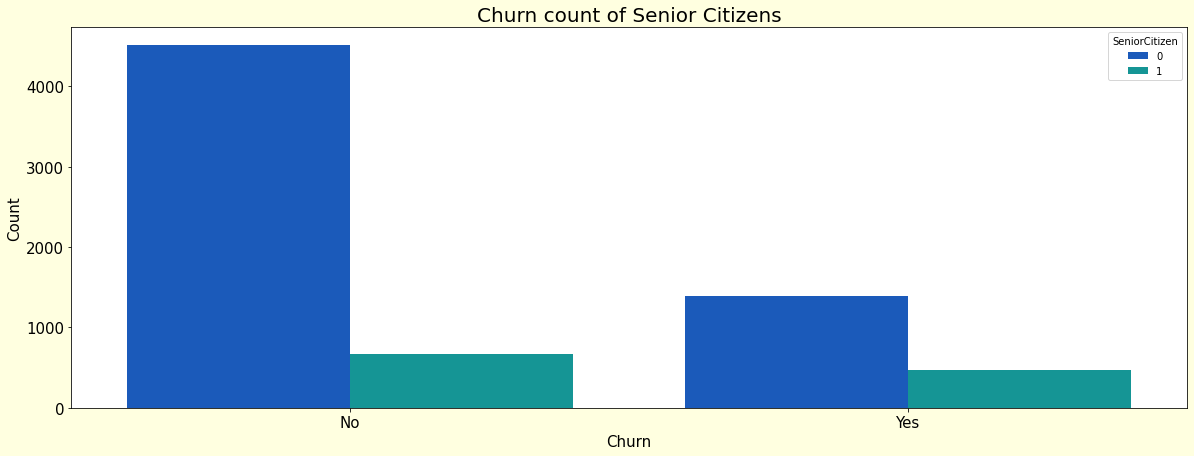

In [17]:
# Senior Citizens
plt.figure(figsize=(20,7),facecolor = 'lightyellow')
sns.countplot( x = 'Churn',hue = 'SeniorCitizen',data = df, palette = 'winter')
plt.title('Churn count of Senior Citizens',fontsize=20)
plt.xlabel('Churn',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

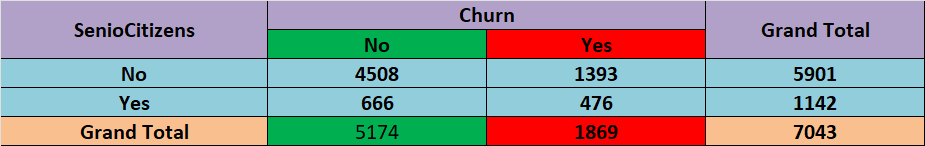

**Observation - There are total 7043 people, out of which 1142 are Senior Citizens and remaining 5901 are not. Out of 1142 senior citizens 476 are churned while 666 are not, remaining 5901 who are not senior citizens 1393 are churned and 4508 are not. The churn ratio of senior citizen is less as compared to non senior citizens**

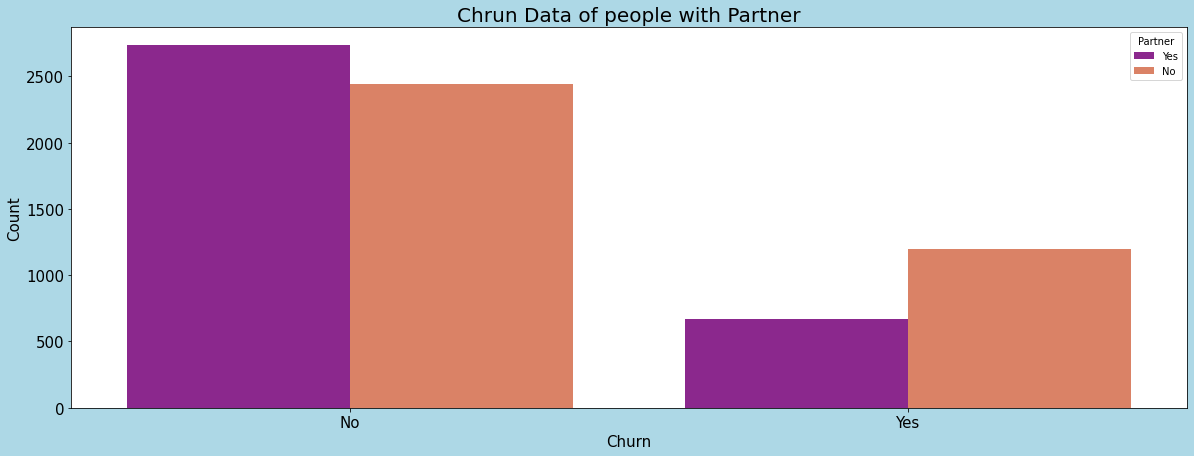

In [18]:
# Partner 
plt.figure(figsize=(20,7), facecolor = 'lightblue')
sns.countplot( x = 'Churn',hue = 'Partner',data = df, palette = 'plasma')
plt.title('Chrun Data of people with Partner',fontsize=20)
plt.xlabel('Churn',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

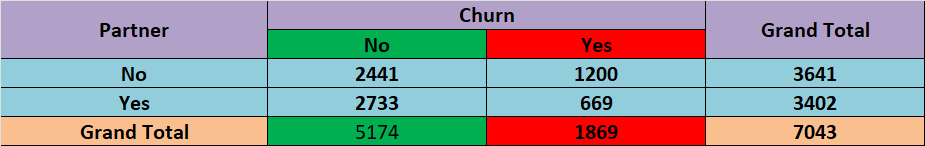

**Observation - There are total 7043 people, 3402 are with partners and 3641 are without partners, Out of 3402 people with partner, 669 are churned while 2733 are not and out of 3641 people without partner 1200 are churned and remaining 2441 are not. The churn ratio of people with partner is less as compoare to people without partners.**

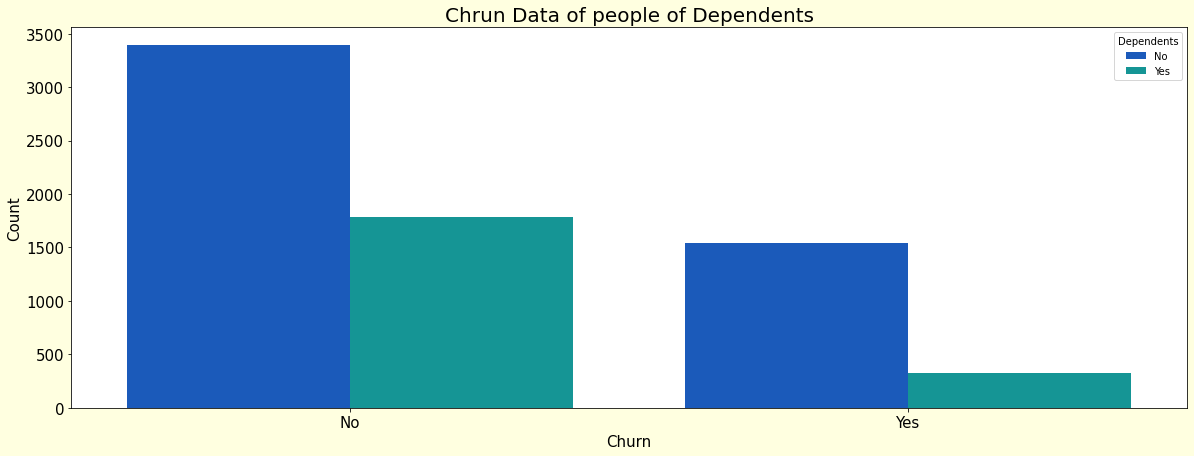

In [19]:
# Dependents
plt.figure(figsize=(20,7), facecolor = 'lightyellow')
sns.countplot( x = 'Churn',hue = 'Dependents',data = df, palette = 'winter')
plt.title('Chrun Data of people of Dependents',fontsize=20)
plt.xlabel('Churn',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

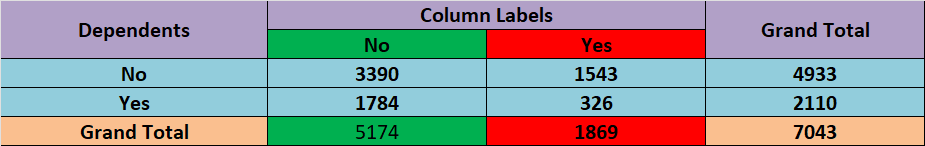

**Observation - There are total 7043 people, 2110 have dependents and remaining 4933 are without dependents, out of 2110 people who have dependents 326 are churned and remaing 1784 are not, out of remaining 4933 people which are without dependents 1543 are churned and remaining 3390 are not. The churn ratio of people with dependents is less are compoared to people without dependents**

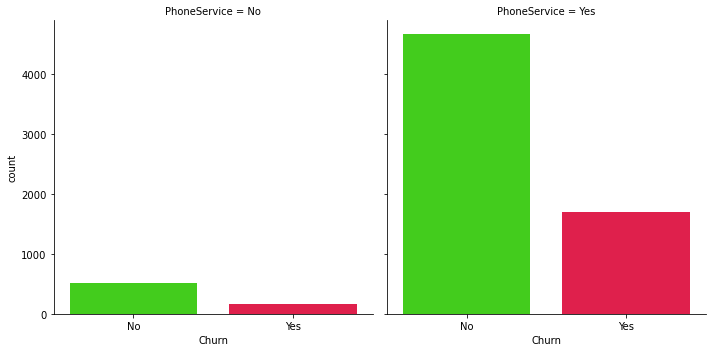

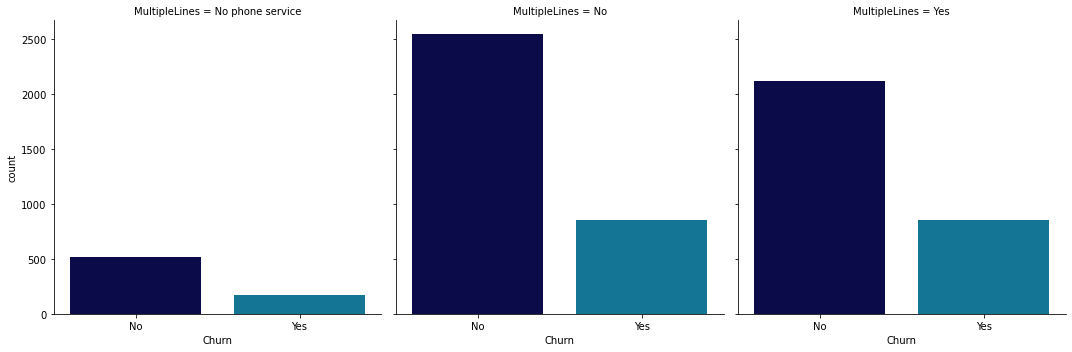

In [20]:
# PhoneService and MultipleLines

sns.catplot(x="Churn",col='PhoneService',data=df,kind="count", palette="prism")
sns.catplot(x="Churn",col='MultipleLines',data=df,kind="count", palette="ocean")

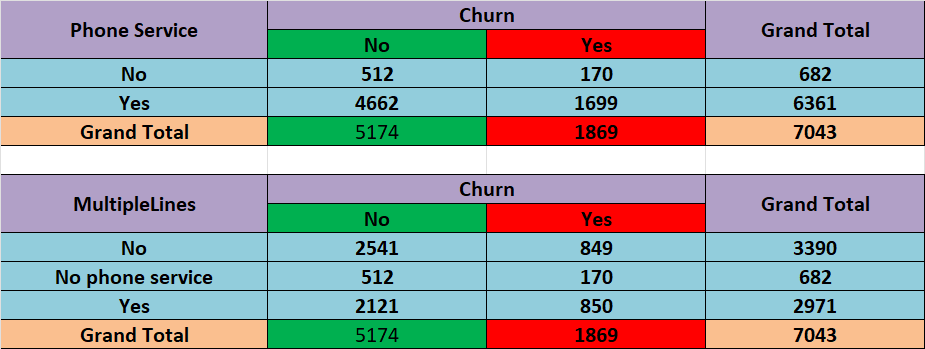

### Observations:
- **In above graph we have compared phoneservices with churn data. These 2 columns are related to each other.**

- **There are total 7043 people.**

- **Out of 7043 people 6361 people use phone service and remaining 682 don't, out of 6361 people who use phone services 1699 are churned and remaining 4662 are not.**

- **Out of 7043 people 2971 people use Multiple line, 3390 dont use Multiple line and remaining 682 dont have phone service.****

### Internet Services and other related columns
**InternetService ,OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies**

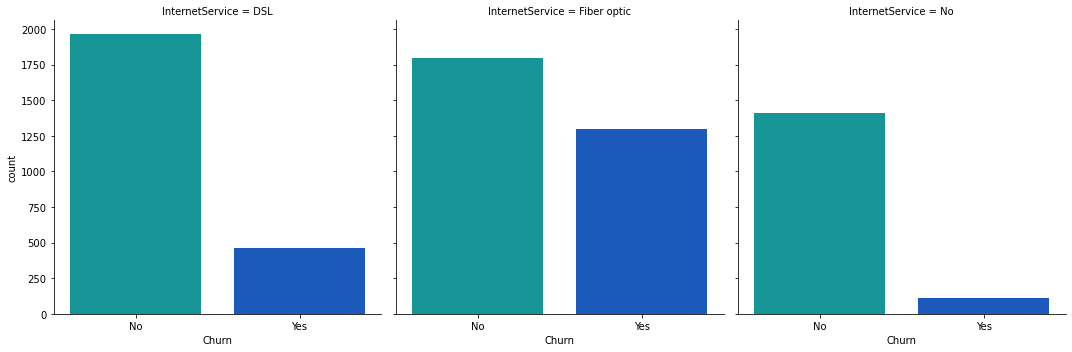

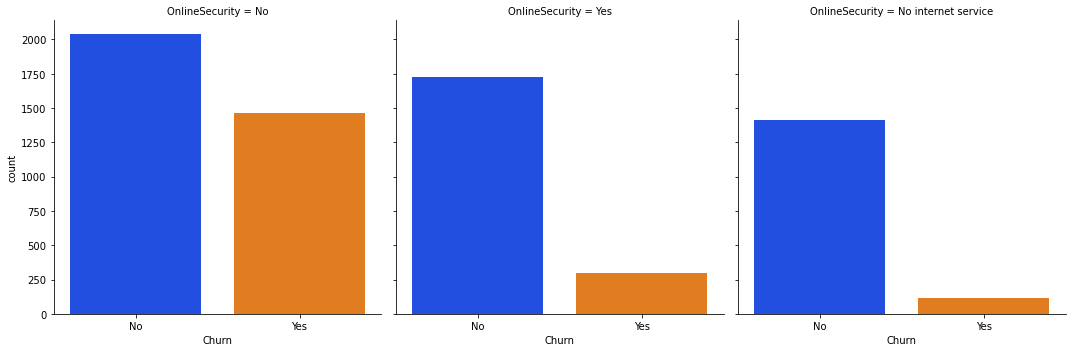

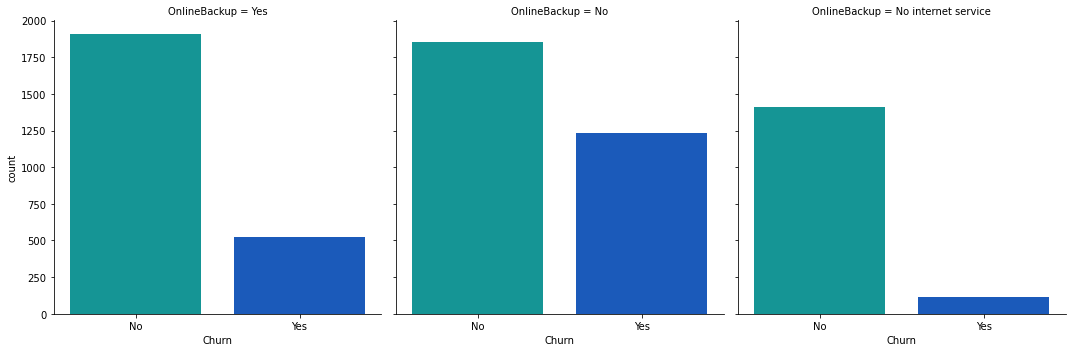

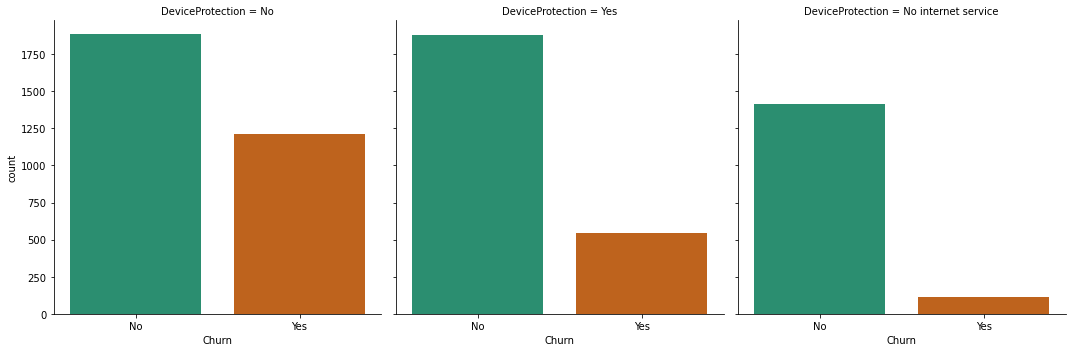

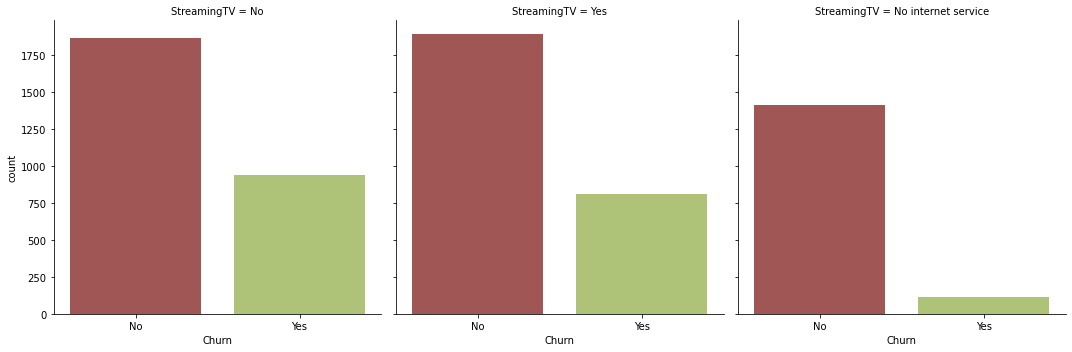

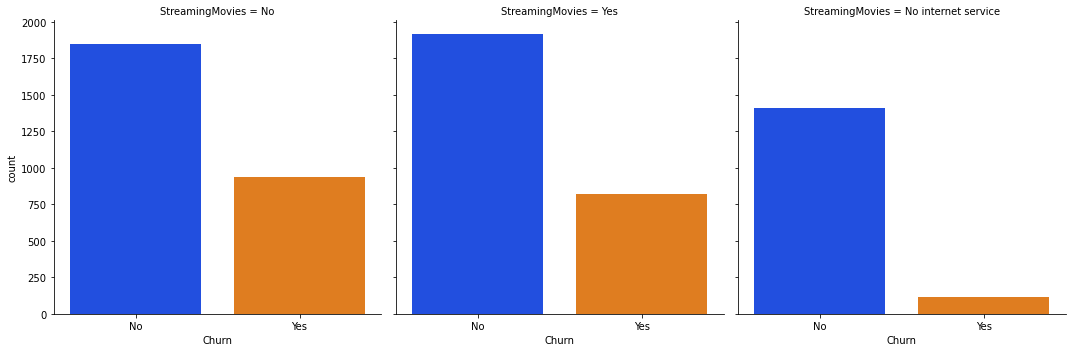

In [21]:
#InternetService ,OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies.

sns.catplot(x="Churn",col='InternetService',data=df,kind="count", palette="winter_r")
sns.catplot(x="Churn",col='OnlineSecurity',data=df,kind="count", palette="bright")
sns.catplot(x="Churn",col='OnlineBackup',data=df,kind="count", palette="winter_r")
sns.catplot(x="Churn",col='DeviceProtection',data=df,kind="count", palette="Dark2")
sns.catplot(x="Churn",col='StreamingTV',data=df,kind="count", palette="tab20b_r")
sns.catplot(x="Churn",col='StreamingMovies',data=df,kind="count", palette="bright")
plt.show()



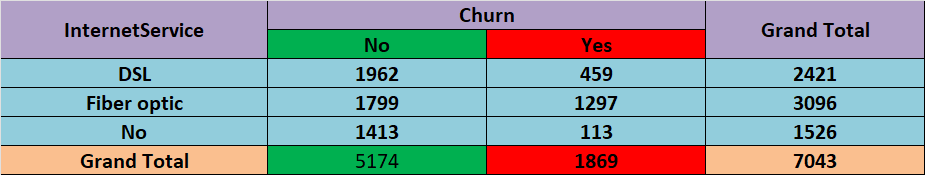

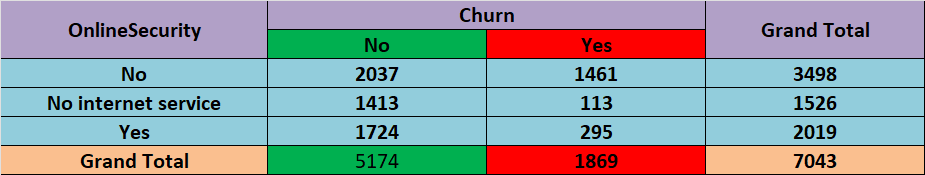

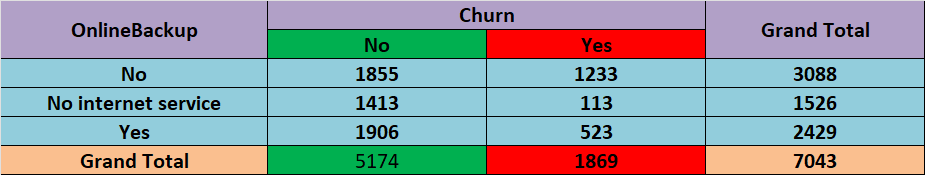

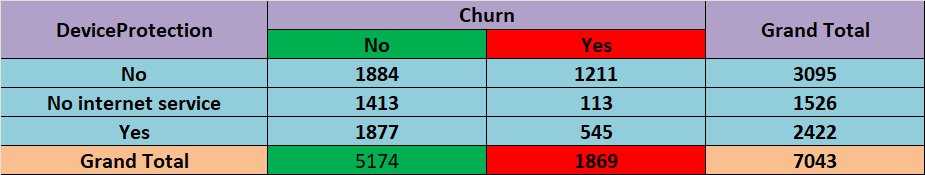

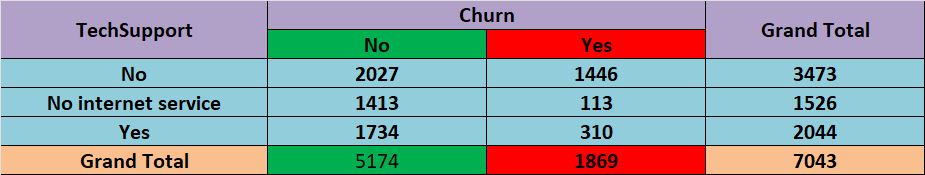

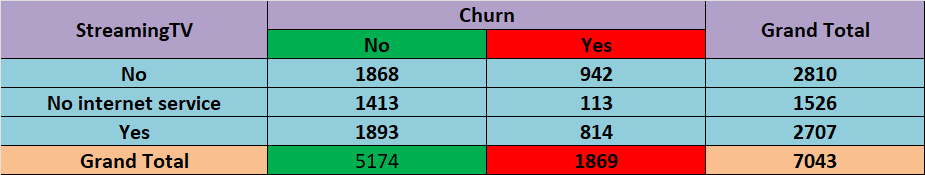

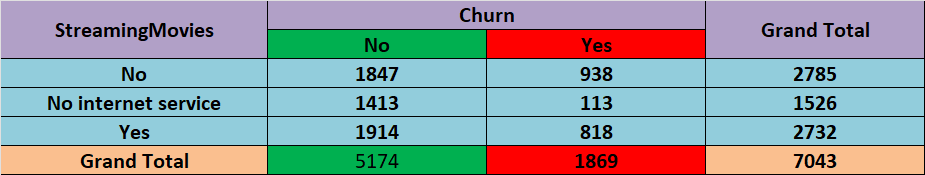

### Observation

- **Above 6 columns are related and dependent on internet services.**

- **Out of 7043 people 2421 use DSL, 3096 use Fiber optic which means total 5517 people use/have internet services and remaining 1526 don’t have use internet services.**

- **Out of 5517 who have/use internet services, 2019 have Online security and remaining 3498 don’t have online security and 1526 don’t have or use internet services.**

- **Out of 5517 wo have/use internet services, 2429 have/use online backup facility, while 3088 don’t and remaining 1526 don’t have/use internet.**

- **2422 people have Device protection, and 3095 don’t have it while remaining 1526 don’t use internet.**

- **2044 people have tech support and 3473 don’t have tech support.**

- **2707 people steam online TV and 2810 don’t, while other/remaining 1526 don’t have or use internet option.**

- **2732 people stream online movies, 2785 don’t stream online movies.**


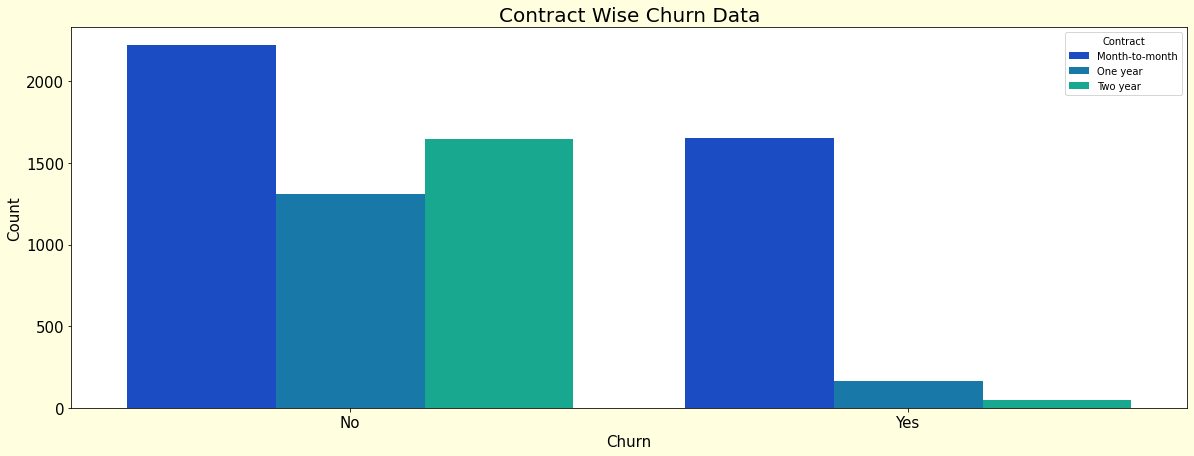

In [22]:
# Contract
plt.figure(figsize=(20,7), facecolor = 'lightyellow')
sns.countplot( x = 'Churn',hue = 'Contract',data = df, palette = 'winter')
plt.title('Contract Wise Churn Data',fontsize=20)
plt.xlabel('Churn',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

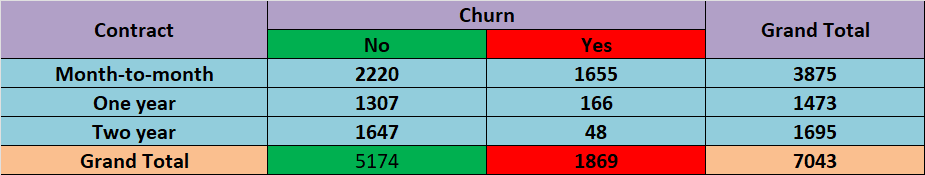

**Out of 7043 people, 3875 people have monthly contract, 1473 people have one year contract and remaining 1695 people have contact of 2 years. Out of 3875 people with montly contract 1655 are churned, out of 1473 people who have yearly contract 166 have churned and out of 1695 people who have 2 years contract 48 are churned. The ratio of customers churned is more in customers with month to month contract, it is nearly 50%.**

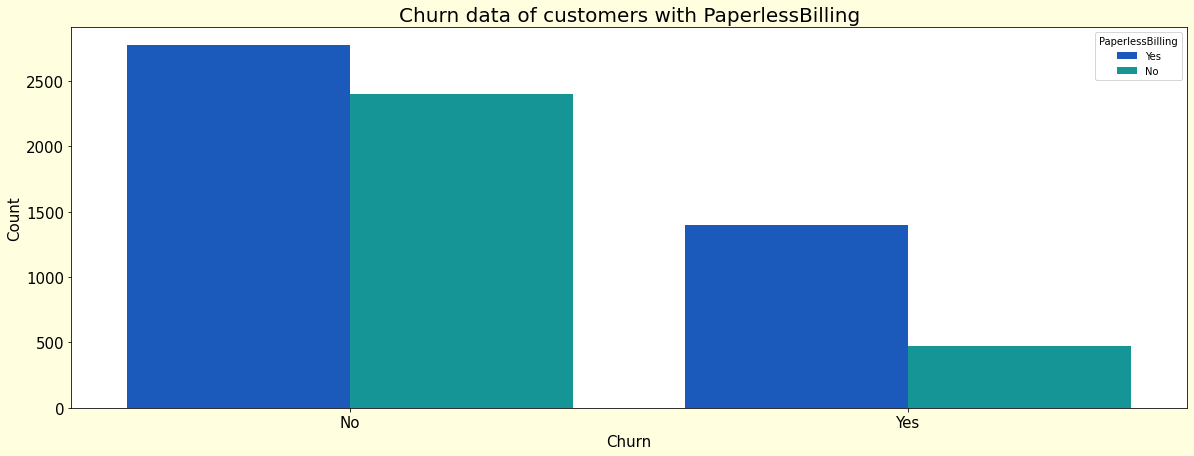

In [23]:
# PaperlessBilling
plt.figure(figsize=(20,7), facecolor = 'lightyellow')
sns.countplot( x = 'Churn',hue = 'PaperlessBilling',data = df, palette = 'winter')
plt.title('Churn data of customers with PaperlessBilling',fontsize=20)
plt.xlabel('Churn',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

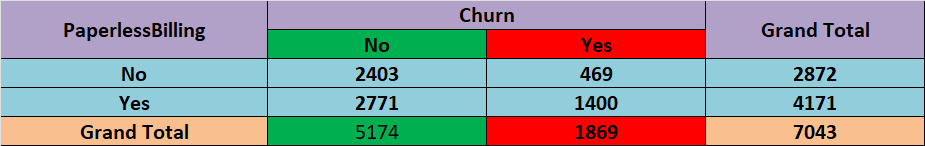

**4171 people are using paperless billing option, while remaining 2872 people are not using this option. Out of 4171 customers who use paperless billing option 1400 are churned and out of 2872 people who do not use this option 469 are churned.**

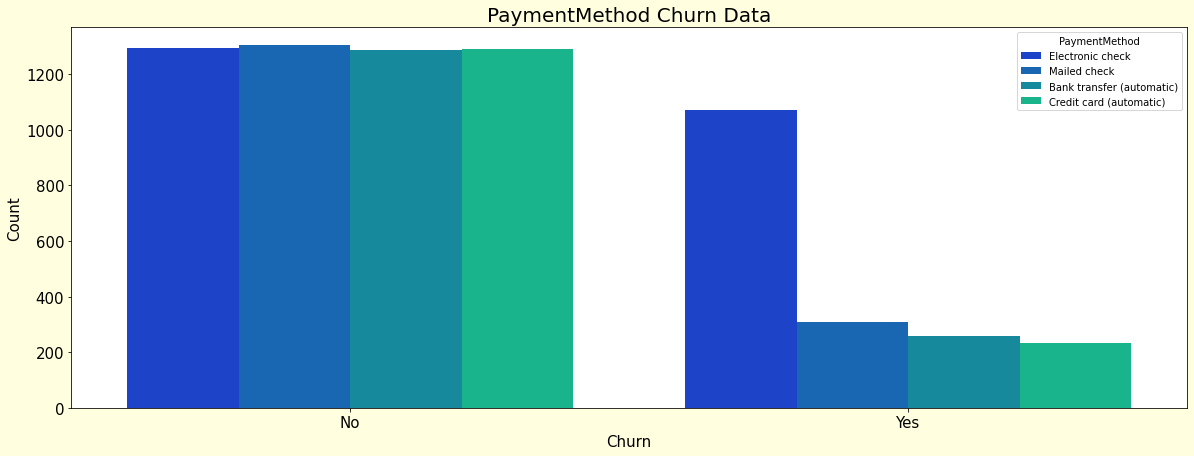

In [24]:
# PaymentMethod
plt.figure(figsize=(20,7), facecolor = 'lightyellow')
sns.countplot( x = 'Churn',hue = 'PaymentMethod',data = df, palette = 'winter')
plt.title('PaymentMethod Churn Data',fontsize=20)
plt.xlabel('Churn',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

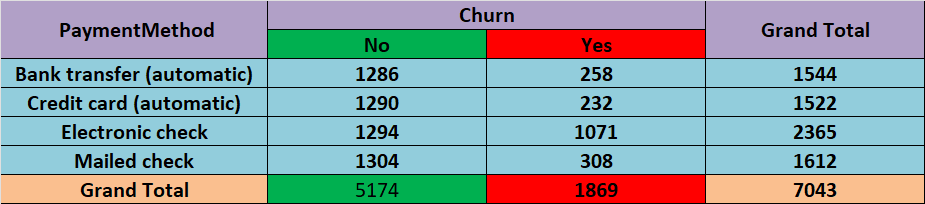

**Observation - 1544 customers have used Bank transfer as payment method, 1522 customer have used Credit card option, 2365 customers have used Electronic check method and remaining 1612 have mailed check. Out these customers who paid via electronic medium are churned most among other payment methods.**

### Checking how Data is distributed in remaining columns

In [25]:
num = df.drop(['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'], axis = 1)

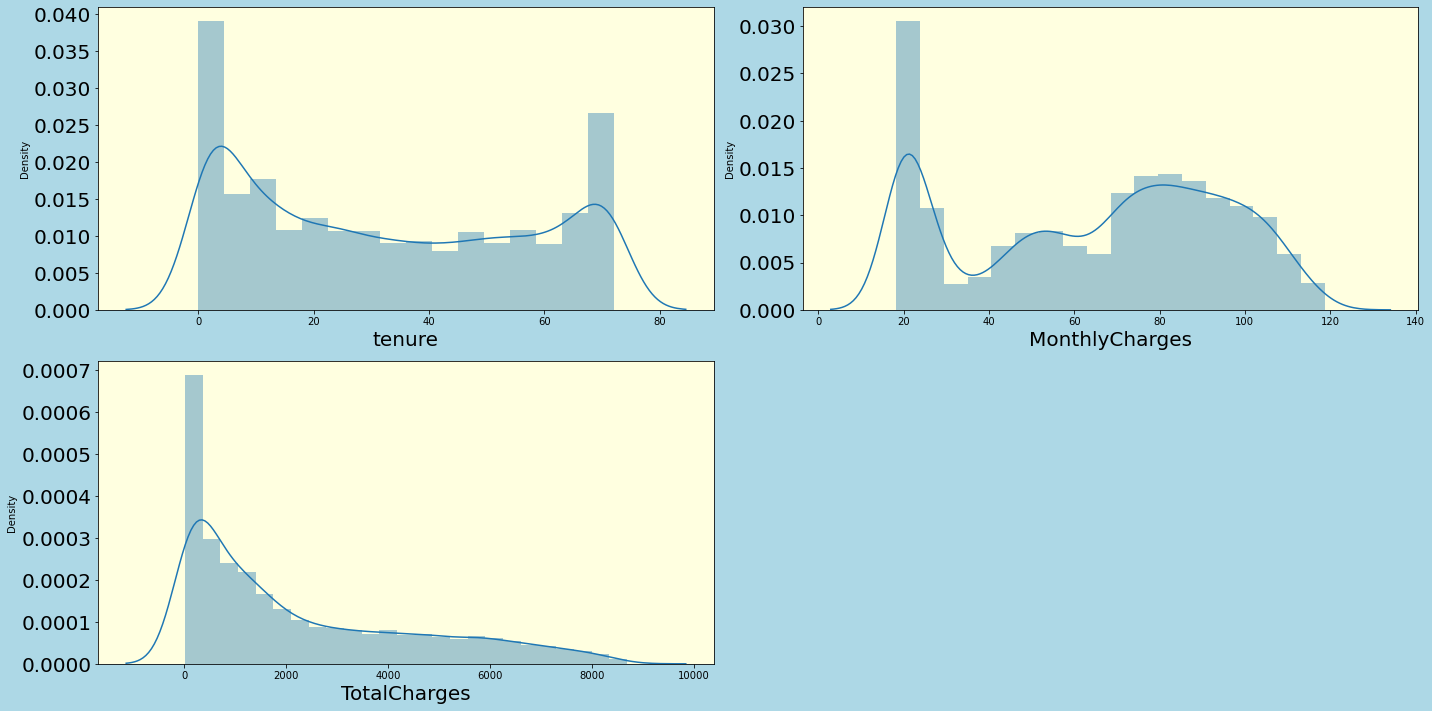

In [26]:
# Checking how data id distributed in remaing columns.

plt.figure(figsize=(20,10),facecolor='lightblue')
plotnumber = 1
for column in num:
    if plotnumber <= 3:
        ax=plt.subplot(2,2,plotnumber, facecolor = 'lightyellow')
        sns.distplot(num[column])
        plt.xlabel(column,fontsize=20)
        plt.yticks(rotation=0,fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Checking outliers
**As other columns are catergorical we will check if our other columns have any outliers.**

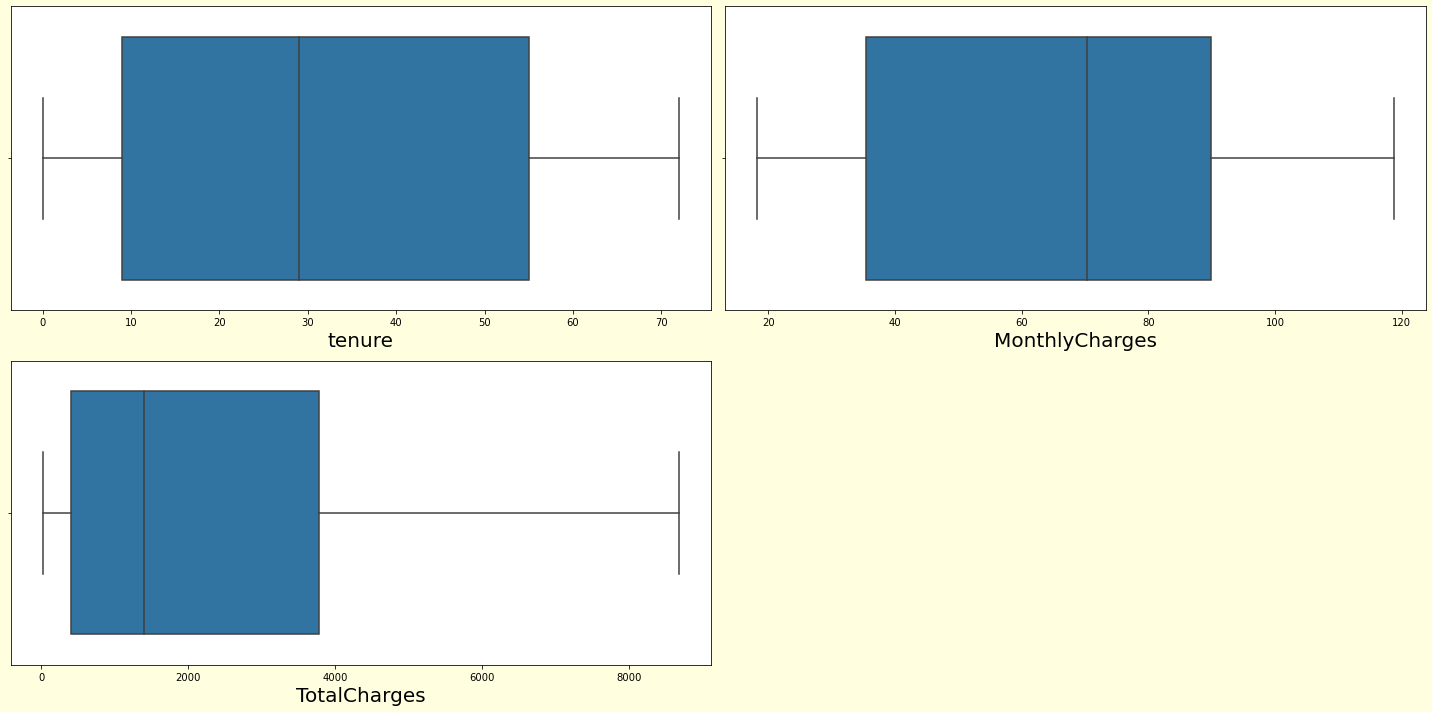

In [27]:
plt.figure(figsize=(20,10),facecolor='lightyellow')
plotnumber = 1
for column in num:
    if plotnumber <= 3:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(num[column])
        plt.xlabel(column,fontsize=20)
        plt.yticks(rotation=0,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### No ourliers are present in these columns.

## Checking and remove skewness in our data

In [28]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

Column TotalCharges have a **right skewness**, we will remove this using **Cube root method**.

In [29]:
df['TotalCharges'] = np.cbrt(df['TotalCharges'])

In [30]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.011168
dtype: float64

## Encoding Using - Label Encoder

**- We will now convert categorical columns to numeric using Label Encoder.**

In [31]:
# Label encoder
from sklearn.preprocessing import LabelEncoder

In [32]:
# Encoding categorical data

LE = LabelEncoder()
columns =['gender','Partner','Dependents','PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' , 'PaperlessBilling', 'PaymentMethod',
        'TotalCharges', 'Churn', 'Contract']
for i in columns:
    df[i] = LE.fit_transform(df[i])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,674,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,3700,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,6305,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,1265,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,1157,1


In [33]:
# Checking some more Statistical information of our columns using describe method
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.0,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.0,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.0,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.0,1.00,1.00,1.00
MultipleLines,7043.0,0.940508,0.948554,0.00,0.0,1.00,2.00,2.00
InternetService,7043.0,0.872923,0.737796,0.00,0.0,1.00,1.00,2.00
OnlineSecurity,7043.0,0.790004,0.859848,0.00,0.0,1.00,2.00,2.00
OnlineBackup,7043.0,0.906432,0.880162,0.00,0.0,1.00,2.00,2.00


## Checking Correlation of the data

In [34]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000524,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106887,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.342425,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.082460,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.869504,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.085612,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.463117,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.209245,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.247168,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.352499,-0.195525


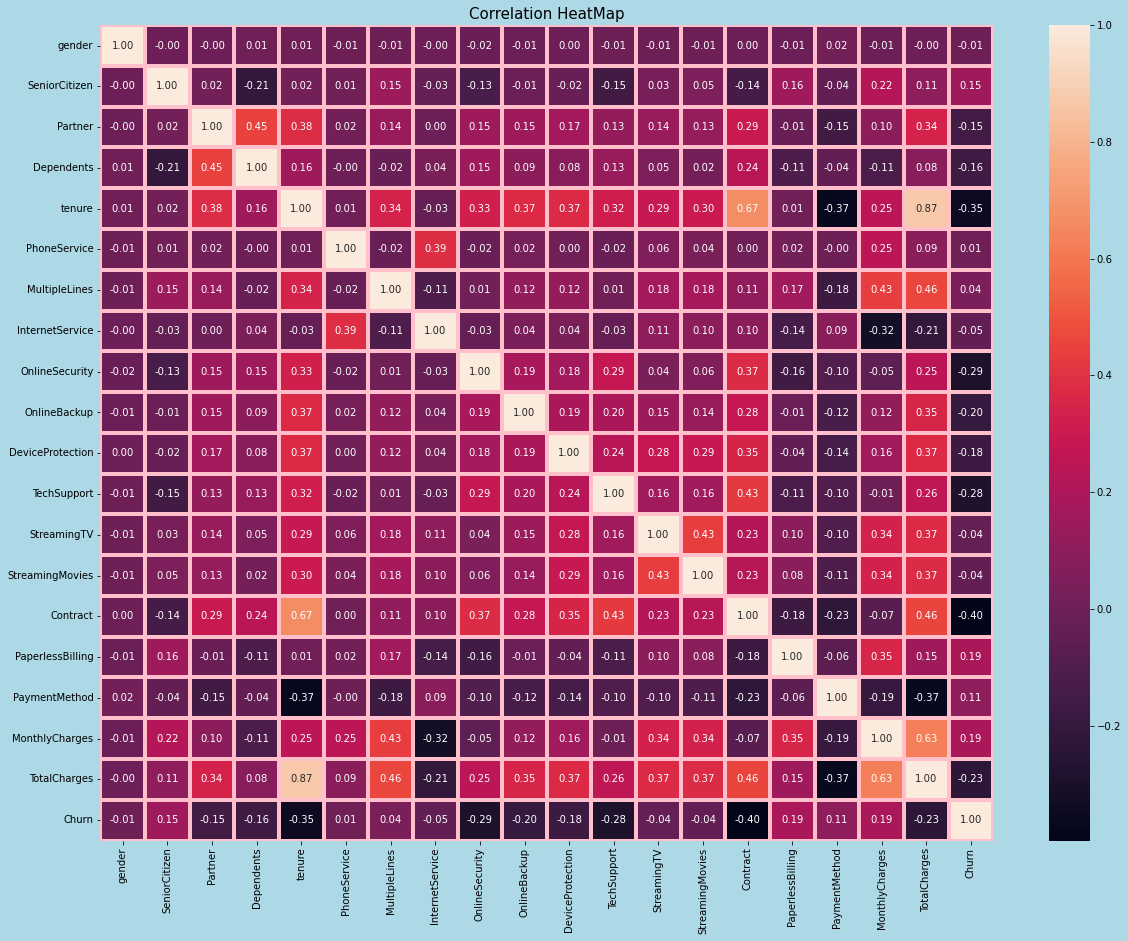

In [35]:
# Ploting heatmap to check correlation of our data.

plt.figure (figsize = (20,15), facecolor = 'lightblue')
plt.title('Correlation HeatMap', fontsize = 15)
sns.heatmap(df.corr(), annot = True , linewidths = 4, linecolor='pink',fmt='.2f')
plt.show()

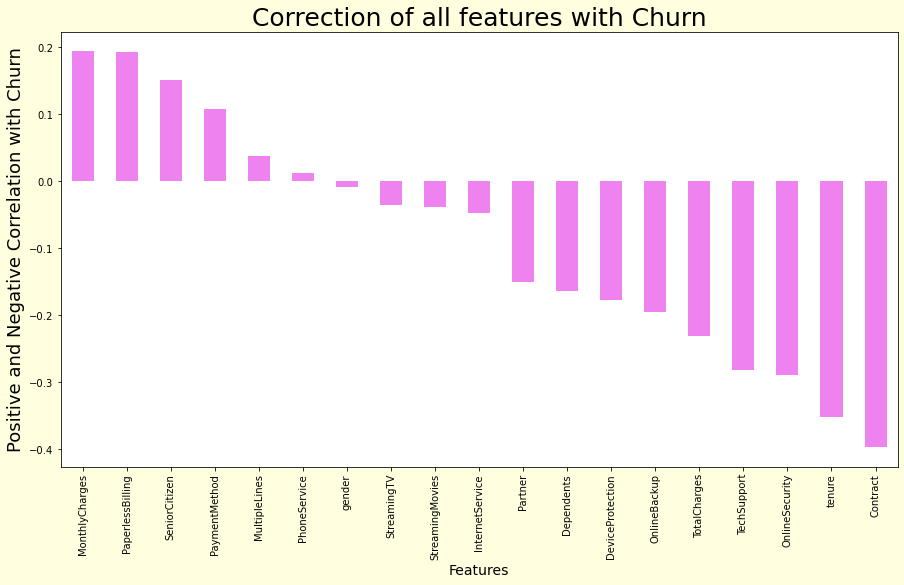

In [36]:
# Checking correlation of all features with income

plt.figure(figsize = (15,8), facecolor = 'lightyellow')
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind = 'bar', facecolor = 'violet')
plt.xlabel("Features", fontsize = 14)
plt.ylabel("Positive and Negative Correlation with Churn", fontsize = 18)
plt.title ("Correction of all features with Churn", fontsize = 25)
plt.show()

### Observations

**1. We have compared target column with other all columns.**

**2. MonthlyCharges, PaperlessBilling, SeniorCitizen, PaymentMethod, MultipleLine, PhoneServices and Gender have postive correlation with target column.**

**2. StreamingTV, InternetServices, Partner, Dependents, DeciveProtection, OnlineBackup, TotalChanrges, TechSupport, OnlineSecurity, Tenure and Contract have negative correlation with target column.**

**3. PhoneServices and Gender have lease correlation with target column.**

**4. MontlyCharges have most positve correlation while Contract have most negative correlation with target column.**

## Dividing Features and Target column to X and Y

In [37]:
## Dividing feature and target column with X and Y

X = df.drop("Churn", axis=1)
Y = df["Churn"]

In [38]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,74
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,3624
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,536
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,3570
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,3700
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,6305
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,1265
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,1157


## Scaling features using Standard Scaler

In [39]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.559718
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.268502
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.321792
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.240692
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.250723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.307641
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.649194
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.946363
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-1.001982


### Variance Inflation Factor (VIF)

VIF measures strenght of correlation among independent variables, it is also called as multicollinearity. Due to this our models can cause problems.

In [41]:
# Importing VIF (variance inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,gender,1.001768
1,SeniorCitizen,1.149708
2,Partner,1.462704
3,Dependents,1.383356
4,tenure,12.914475
5,PhoneService,1.622420
6,MultipleLines,1.399700
7,InternetService,1.877489
8,OnlineSecurity,1.257636
9,OnlineBackup,1.193752


**Observation -**

1. We have calculated VIF value which will state which variable have multicolinearity problem.
2. Columns **TotalCharges** and **tenure** have values greater than 10 which will cause multicolinearity issue.
3. **TotalCharges** have vlaue greater than **tenure** we will remove **TotalCharges** column and then again check VIF.

In [43]:
# Dropting TotalCharges column
X.drop("TotalCharges",axis=1,inplace=True)

In [44]:
# Checking VIF after removing TotalCharges column form our dataset
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,gender,1.001684
1,SeniorCitizen,1.149639
2,Partner,1.460856
3,Dependents,1.382106
4,tenure,2.754468
5,PhoneService,1.622282
6,MultipleLines,1.391652
7,InternetService,1.825876
8,OnlineSecurity,1.247696
9,OnlineBackup,1.185932


**Observation :**

After removing **TotalCharges** columns VIF vlaues for all available columns are now less than 10.

## Oversampling of Data

Target variable's data is not balanced, we will balance the data using oversampling method.

**Not Churned(0) - 5174**

**Churned(1)     - 1869**

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
SM = SMOTE()
X , Y = SM.fit_resample(X,Y)
Y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

As our data is balanced and pre processing is completed we will begin with building our machine learning models.

# Getting best random state

In [47]:
# Importing RandomForest, train_test_split and accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [48]:
# Getting best Accuracy score for Random State
MAX_Acc = 0
MAX_RS = 0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.20, random_state =i)
    RFC = RandomForestClassifier()
    RFC.fit(X_train,Y_train)
    prediction = RFC.predict(X_test)
    acc = accuracy_score(Y_test, prediction)
    if acc > MAX_Acc:
        MAX_Acc = acc
        MAX_RS = i
print("Best accuracy is ",MAX_Acc," for Random state ",MAX_RS)

Best accuracy is  0.8681159420289855  for Random state  161


## Train_Test_Split

In [49]:
# Spliting data into train and test using best random_state
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20, random_state = MAX_RS)

# Building Models

## Classicification problem
- **LogisticRegression**
- **KNeighborsClassifier**
- **DecisionTreeClassifier**
- **RandomForestClassifier**
- **SVC**
- **AdaBoostClassifier**

In [50]:
# Importing LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, 
# SVC and AdaBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

### Checking accuracy using train data

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state = MAX_RS)

models = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),AdaBoostClassifier()]
for model in models:
    model.fit(X_train,Y_train)
    predlr = model.predict(X_train)
    print("Model Name",model)
    print("Accuracy",accuracy_score(Y_train,predlr)*100)
    print(confusion_matrix(Y_train,predlr))
    print(classification_report(Y_train,predlr))
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>','\n')

Model Name LogisticRegression()
Accuracy 77.16839816380768
[[3027 1078]
 [ 812 3361]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      4105
           1       0.76      0.81      0.78      4173

    accuracy                           0.77      8278
   macro avg       0.77      0.77      0.77      8278
weighted avg       0.77      0.77      0.77      8278

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

Model Name KNeighborsClassifier()
Accuracy 84.83933317226384
[[3091 1014]
 [ 241 3932]]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      4105
           1       0.79      0.94      0.86      4173

    accuracy                           0.85      8278
   macro avg       0.86      0.85      0.85      8278
weighted avg       0.86      0.85      0.85      8278

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

Model Name DecisionTreeClassifier()
Accura

Highest Accuracy 99.81879681082387 is of RandomForestClassifier

### Checking accuracy using test data

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state = MAX_RS)
models = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),AdaBoostClassifier()]
for model in models:
    model.fit(X_train,Y_train)
    predlr2 = model.predict(X_test)
    print("Model Name",model)
    print("Accuracy = ",accuracy_score(Y_test,predlr2)*100)
    print(confusion_matrix(Y_test,predlr2))
    print(classification_report(Y_test,predlr2))
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>','\n')

Model Name LogisticRegression()
Accuracy =  79.42028985507247
[[821 248]
 [178 823]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1069
           1       0.77      0.82      0.79      1001

    accuracy                           0.79      2070
   macro avg       0.80      0.80      0.79      2070
weighted avg       0.80      0.79      0.79      2070

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

Model Name KNeighborsClassifier()
Accuracy =  79.7584541062802
[[752 317]
 [102 899]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1069
           1       0.74      0.90      0.81      1001

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

Model Name DecisionTreeClassifier()
Accuracy 

Accuracy =  86.76328502415458 of Model Name RandomForestClassifier

## Cross Validation Score

In [53]:
# Importing Cross_val_score fromm sklearn
from sklearn.model_selection import cross_val_score

In [54]:
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),AdaBoostClassifier()]
for model in models:
    scr = cross_val_score(model,X,Y,cv=5)
    print("Model Name :",model)
    print("Cross validation score is: ", scr.mean()*100)
    print("Mean score :", (scr.mean())*100)
    print("STD :", scr.std()*100)
    print('===============================================')

Model Name : LogisticRegression()
Cross validation score is:  77.46453162978686
Mean score : 77.46453162978686
STD : 1.2990137696635726
Model Name : KNeighborsClassifier()
Cross validation score is:  78.74010409005261
Mean score : 78.74010409005261
STD : 1.5785362504165537
Model Name : DecisionTreeClassifier()
Cross validation score is:  78.34441712605917
Mean score : 78.34441712605917
STD : 5.062498695730119
Model Name : RandomForestClassifier()
Cross validation score is:  85.12856685882933
Mean score : 85.12856685882933
STD : 5.965474707677712
Model Name : SVC()
Cross validation score is:  80.44118491744945
Mean score : 80.44118491744945
STD : 2.6132846813569857
Model Name : AdaBoostClassifier()
Cross validation score is:  81.05017943742806
Mean score : 81.05017943742806
STD : 3.5154196234207036


Highest accuracy as below
- Model Name : RandomForestClassifier()
- Cross validation score is:  85.12856685882933
- Mean score : 85.12856685882933
- STD : 5.965474707677712

## Hyper Parameter Tunning

In [55]:
# Importing GridSearchCV for Hyper Parameter Tunning
from sklearn.model_selection import GridSearchCV

In [56]:
parameters = {'criterion':['gini'], 'max_features':['auto'], 'n_estimators':[0,200], 'max_depth':[2,3,4,5,6,8]}

In [57]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv = 5)

In [58]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [59]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [60]:
Chrun = RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
Chrun.fit(X_train, Y_train)
pred = Chrun.predict(X_train)
acc=accuracy_score(Y_train,pred)
print("Accuracy after tuning:",acc*100,"%")

Accuracy after tuning: 85.17757912539261 %


In [61]:
Chrun = RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
Chrun.fit(X_train, Y_train)
pred = Chrun.predict(X_test)
acc=accuracy_score(Y_test,pred)
print("Accuracy after tuning:",acc*100,"%")

Accuracy after tuning: 84.63768115942028 %


Train and test data have alomost equal accuracy.

In [62]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

<AxesSubplot:>

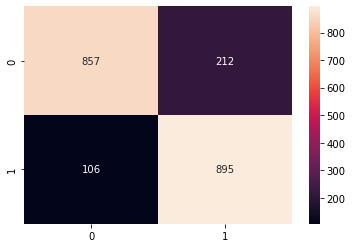

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,pred)
sns.heatmap(confusion_matrix(Y_test,pred),annot=True, fmt='d')

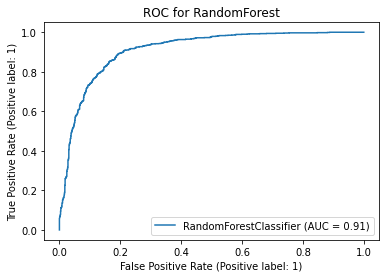

In [64]:
plot_roc_curve(Chrun, X_test, Y_test)
plt.title("ROC for RandomForest")
plt.show()

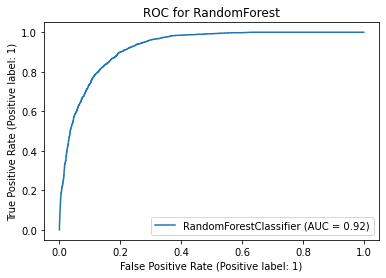

In [65]:
plot_roc_curve(Chrun, X_train, Y_train)
plt.title("ROC for RandomForest")
plt.show()

# Saving Model

In [66]:
import joblib
joblib.dump(Chrun,"Customer_Churn_Analysis.pkl")

['Customer_Churn_Analysis.pkl']

# Conclusion

This was a classification problem, we have used total 6 algorithms to predict the churn, out of these 6 (LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, SVC and AdaBoostClassifier) RandomForest Classifier has the highest accuracy with approx 85% in both train as well as test data.